<a href="https://colab.research.google.com/github/SeongGwan-a/Project-CAU_Data_Analysis/blob/main/%EA%B3%A8%EB%AA%A9%EB%8C%80%EC%9E%A5%ED%8C%80_%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%BD%94%EB%93%9C1(%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 생성**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **추정매출데이터 생성**

In [ ]:
# 추정매출데이터 로드 ( 출처: 서울열린데이터광장 )

sales2013 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2013.csv", encoding="CP949")
sales2014 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2014.csv", encoding="CP949")
sales2015 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2015.csv", encoding="CP949")
sales2016 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2016.csv", encoding="CP949")
sales2017 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2017.csv", encoding="CP949")
sales2018 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv", encoding="CP949")
sales2019 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv", encoding="CP949")
sales2020 = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정매출)_2020.csv", encoding="CP949")

In [ ]:
# 2013년부터 2020년 데이터 칼럼명을 동일하게 세팅 (2017년을 기준으로 맞춤)

for i in range(2013,2021):
  locals()["sales" + str(i)].columns = sales2017.columns

In [ ]:
# 연도별 데이터를 통합하고 업종구분 칼럼 추가

sales = pd.concat([sales2013,sales2014,sales2015,sales2016,sales2017,sales2018,sales2019,sales2020])
sales["induty_cd"] = sales["svc_induty_cd"].str[:3]

In [ ]:
# 분석에 필요한 칼럼 설정

col_ = ["stdr_yy_cd", "stdr_qu_cd", "trdar_cd_nm", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

In [ ]:
# 방송출연 점포가 포함되었거나 그 주변의 전통시장, 골목상권 설정

haebangchon = ["신흥시장","신흥로20길","소월로20길"]
seongsu = ["뚝섬로5길","상원길","성수일로6길","아차산로5길","왕십리로6길"]
seongnae = ["천호대로162길","천호옛길","천호옛14길","풍성로37가길","천호대로170길"]
hongeun = ["포방터시장"]
chungpa = ["청파로47길","청파로47나길","원효로89길","한강대로 88길","두텁바위로1길"]
hoegi = ["경희대로3길","경희대로4길","회귀시장"]
dunchon = ["천호대로187길","명일로13길","양재대로96길"]
jeongneung = ["정릉아리랑시장","정릉로26길","정릉로27길"]
hongje = ["세무서길","세무서2길"]
gongneung = ["공릉동도깨비시장", "동일로192길"]
chang = ["노해로60길","도봉로109길","도봉로114길","쌍문역골목시장"]
joonggokdong = ["긴고랑로9길","중곡제일시장","긴고랑로7길","긴고랑로8길","용마산로21길","긴고랑로20길"]
sangdo = ["상도로37길", "상도로47길"]

# haebangchon = ["신흥시장"]
# seongsu = ["상원길"]
# seongnae = ["천호대로162길"]
# hongeun = ["포방터시장"]
# chungpa = ["청파로47길"]
# hoegi = ["경희대로4길"]
# dunchon = ["양재대로96길"]
# jeongneung = ["정릉아리랑시장"]
# hongje = ["세무서길"]
# gongneung = ["공릉동도깨비시장"]
# chang = ["도봉로114길"]
# joonggokdong = ["긴고랑로9길"]
# sangdo = ["상도로37길", "상도로47길"]

input = [haebangchon,seongsu,seongnae,hongeun,chungpa,hoegi,dunchon,jeongneung,hongje,gongneung,chang,joonggokdong]

#input = {"chungpa":chungpa, "joonggokdong":joonggokdong, "seongnae":seongnae, "chang":chang, 
#         "hoegi":hoegi, "seongsu":seongsu, "hongeun":hongeun, "dunchon":dunchon, "hongje":hongje, 
#         "jeongneung":jeongneung, "gongneung":gongneung, "haebangchon":haebangchon}

In [ ]:
# 필요 데이터 생성 함수 ( 외식 업종(CS1)만 포함한 상권별 합계 데이터 )

def sales_by_sanggwon(area):
  rdf = sales[sales["trdar_cd_nm"].isin(area) & sales["induty_cd"].isin(["CS1"])]
  rdf = rdf.groupby(["stdr_yy_cd","stdr_qu_cd", "trdar_cd_nm"]).sum().reset_index()[col_]
  return rdf

In [ ]:
# 데이터 생성 및 csv저장

s_sales = sales_by_sanggwon(input[0])
s_sales["area"] = 0

for i in range(1,len(input)):
  temp = sales_by_sanggwon(input[i])
  temp["area"] = i
  s_sales = pd.concat( [ s_sales, temp ] )

s_col = ["area"] + col_

s_sales = s_sales[s_col].sort_values(by="trdar_cd_nm")
s_sales.to_csv("s_sales.csv")

In [ ]:
# 주변 상권들을 하나의 area로 합친 데이터 생성

col_area = ["stdr_yy_cd", "stdr_qu_cd", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

def sales_by_area(area):
  rdf = sales[sales["trdar_cd_nm"].isin(area) & sales["induty_cd"].isin(["CS1"])]
  rdf = rdf.groupby(["stdr_yy_cd","stdr_qu_cd"]).sum().reset_index()[col_area]
  return rdf

a_sales = sales_by_area(input[0])
a_sales["area"] = 0

for i in range(1,len(input)):
  temp = sales_by_area(input[i])
  temp["area"] = i
  a_sales = pd.concat( [ a_sales, temp ] )

a_col = ["area"] + col_area

a_sales = a_sales[a_col]
a_sales.to_csv("a_sales.csv")

In [ ]:
# 예측에 필요한 상도동 골목상권의 데이터 생성 및 저장

sangdo = ["상도로37길", "상도로47길"]

sangdo_sales = sales_by_sanggwon(sangdo)

sangdo_sales = sangdo_sales[col_]
sangdo_sales.to_csv("sangdo_sales.csv")

## **추정유동인구데이터 생성**

In [ ]:
# 추정유동인구데이터 로드 ( 출처: 서울시열린데이터광장 )

pop = pd.read_csv("/content/drive/My Drive/골목대장데이터/서울시 우리마을가게 상권분석서비스(상권-추정유동인구)_2020.csv", encoding="CP949")

In [ ]:
# 필요 데이터 생성 함수 ( 상권별 합계 데이터 )

pop_col = ["기준 년코드","기준_분기_코드","상권_코드_명", "총_유동인구_수","남성_유동인구_수","여성_유동인구_수","연령대_10_유동인구_수","연령대_20_유동인구_수","연령대_30_유동인구_수","연령대_40_유동인구_수","연령대_50_유동인구_수","연령대_60_이상_유동인구_수"]

def pop_by_sanggwon(area):
  rdf = pop[ pop["상권_코드_명"].isin(area) ]
  rdf = rdf.groupby(["기준 년코드","기준_분기_코드","상권_코드_명"]).sum().reset_index()[pop_col]
  return rdf


# 필요 데이터 생성 및 csv 저장

s_pop = pop_by_sanggwon(input[0])
s_pop["area"] = 0

for i in range(1,len(input)):
  temp = pop_by_sanggwon(input[i])
  temp["area"] = i
  s_pop = pd.concat([s_pop,temp])

p_col = ["area"] + pop_col

s_pop = s_pop[p_col]
s_pop.to_csv("s_pop.csv")

In [ ]:
# 필요 데이터 생성 함수 ( area별 합계 데이터 )

pop_col_area = ["기준 년코드","기준_분기_코드", "총_유동인구_수","남성_유동인구_수","여성_유동인구_수","연령대_10_유동인구_수","연령대_20_유동인구_수","연령대_30_유동인구_수","연령대_40_유동인구_수","연령대_50_유동인구_수","연령대_60_이상_유동인구_수"]

def pop_by_area(area):
  rdf = pop[pop["상권_코드_명"].isin(area)]
  rdf = rdf.groupby(["기준 년코드","기준_분기_코드"]).sum().reset_index()[pop_col_area]
  return rdf


# 필요 데이터 생성 및 csv 저장

a_pop = pop_by_area(input[0])
a_pop["area"] = 0

for i in range(1,len(input)):
  temp = pop_by_area(input[i])
  temp["area"] = i
  a_pop = pd.concat([a_pop,temp])

p_col_area = ["area"] + pop_col_area

a_pop = a_pop[p_col_area]
a_pop.to_csv("a_pop.csv")

In [ ]:
# 예측에 필요한 상도동 골목상권의 데이터 생성 및 저장

sangdo_pop = pop_by_sanggwon(sangdo)

sangdo_pop = sangdo_pop[pop_col]
sangdo_pop.to_csv("sangdo_pop.csv")

# **매출데이터 수집오류 및 코로나에 따른 데이터보정**

In [ ]:
# 골목상권, 전통시장, CS1만 가져오고, 연도, 분기별 합계 데이터 생성

sales = sales[ (sales["trdar_se_cd_nm"].isin(["골목상권", "전통시장"])) & (sales["induty_cd"].isin(["CS1"])) ]
sales_sum = sales.groupby(["stdr_yy_cd","stdr_qu_cd"]).sum().reset_index()

## **매출액 보정률 계산**

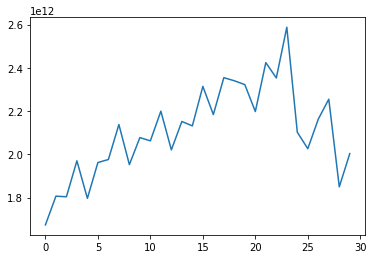

In [ ]:
# 기존 데이터 확인

plt.plot("thsmon_selng_amt", data=sales_sum)

In [ ]:
#연도별 평균 생성

mean2013 = sales_sum[ sales_sum["stdr_yy_cd"] == 2013 ] ["thsmon_selng_amt"].mean()
mean2014 = sales_sum[ sales_sum["stdr_yy_cd"] == 2014 ] ["thsmon_selng_amt"].mean()
mean2015 = sales_sum[ sales_sum["stdr_yy_cd"] == 2015 ] ["thsmon_selng_amt"].mean()
mean2016 = sales_sum[ sales_sum["stdr_yy_cd"] == 2016 ] ["thsmon_selng_amt"].mean()
mean2017 = sales_sum[ sales_sum["stdr_yy_cd"] == 2017 ] ["thsmon_selng_amt"].mean()
mean2018 = sales_sum[ sales_sum["stdr_yy_cd"] == 2018 ] ["thsmon_selng_amt"].mean()
mean2019 = sales_sum[ sales_sum["stdr_yy_cd"] == 2019 ] ["thsmon_selng_amt"].mean()
mean2020 = sales_sum[ sales_sum["stdr_yy_cd"] == 2020 ] ["thsmon_selng_amt"].mean()

In [ ]:
# 연도별 전년도대비 성장률 계산 후 확인

rate2014 = (mean2014 - mean2013) / mean2013
rate2015 = (mean2015 - mean2014) / mean2014
rate2016 = (mean2016 - mean2015) / mean2015
rate2017 = (mean2017 - mean2016) / mean2016
rate2018 = (mean2018 - mean2017) / mean2017
rate2019 = (mean2019 - mean2018) / mean2018
rate2020 = (mean2020 - mean2019) / mean2019

rate2014, rate2015, rate2016, rate2017, rate2018, rate2019, rate2020

(0.08518546113633904,
 0.05323279261156138,
 0.03935236420127287,
 0.06755828856944263,
 0.03931080391278945,
 -0.10624386591761292,
 -0.09828061082274578)

In [ ]:
# 전년도 대비 성장률 평균 계산

(rate2014 + rate2015 + rate2016 + rate2017 + rate2018) / 5

0.05692794208628107

In [ ]:
# 2019년 데이터에 더해줘야할 성장률 계산

rate = 0.05692794208628107  + (-rate2019)
rate

0.163171808003894

In [ ]:
# 2019년 데이터에 18년의 rate를 곱해준 값을 더해서 저장

sales_up_2019 = sales_sum[ sales_sum["stdr_yy_cd"] == 2019 ] ["thsmon_selng_amt"] + (mean2018*rate)

sales_sum1 = sales_sum.copy()

for i in range(0,4):
  sales_sum1.iloc[i+24][3] = sales_up_2019.iloc[i]

In [ ]:
# 보정된 데이터로 다시 계산

mean2019_up = sales_sum1[ sales_sum1["stdr_yy_cd"] == 2019 ] ["thsmon_selng_amt"].mean()

rate2020_up = (mean2020 - mean2019_up) / mean2019_up

rate_2 = rate2020_up - rate2020
rate_2

-0.13921023107163907

In [ ]:
# 보정된 19년 데이터로 20년 데이터 보정

sales_up_2020 = sales_sum1[ sales_sum1["stdr_yy_cd"] == 2020 ] ["thsmon_selng_amt"] + (mean2019_up*(-rate_2))

sales_sum2 = sales_sum1.copy()

for i in range(0,2):
  sales_sum2.iloc[i+28][3] = sales_up_2020.iloc[i]

In [ ]:
# 2020년의 코로나영향 제거

sales_up_c_2020 = sales_sum2[ sales_sum2["stdr_yy_cd"] == 2020 ] ["thsmon_selng_amt"] + (mean2019_up*(-rate2020))

sales_sum3 = sales_sum2.copy()

for i in range(0,2):
  sales_sum3.iloc[i+28][3] = sales_up_c_2020.iloc[i]

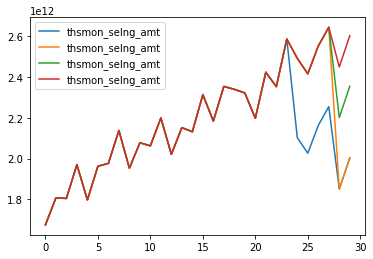

In [ ]:
# 보정데이터 시각화

plt.plot("thsmon_selng_amt", data=sales_sum)
plt.plot("thsmon_selng_amt", data=sales_sum1)
plt.plot("thsmon_selng_amt", data=sales_sum2)
plt.plot("thsmon_selng_amt", data=sales_sum3)
plt.legend()

## **매출액 데이터 보정**

### **2019 보정**

In [ ]:
# 2018년 연평균 값 계산

s_sales_2018_mean = s_sales[s_sales["stdr_yy_cd"] == 2018].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2019년 데이터 분기별 분할 저장

s_sales_2019 = s_sales[s_sales["stdr_yy_cd"] == 2019]
s_sales_2019_1 =  s_sales_2019[s_sales_2019["stdr_qu_cd"] == 1].reset_index()
s_sales_2019_2 =  s_sales_2019[s_sales_2019["stdr_qu_cd"] == 2].reset_index()
s_sales_2019_3 =  s_sales_2019[s_sales_2019["stdr_qu_cd"] == 3].reset_index()
s_sales_2019_4 =  s_sales_2019[s_sales_2019["stdr_qu_cd"] == 4].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

def yy2019(qu):
  temp2 = []
  for j in range(40):
    temp = s_sales[ (s_sales["stdr_yy_cd"] == 2019) & (s_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_amt"].iloc[j]  + (s_sales_2018_mean["thsmon_selng_amt"][j]*rate)
    temp2.append(temp)
  return temp2

In [ ]:
# 각 분기별 보정값 저장

temp2 = yy2019(1)

s_sales_add_1 = pd.concat([s_sales_2019_1, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(2)

s_sales_add_2 = pd.concat([s_sales_2019_2, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(3)

s_sales_add_3 = pd.concat([s_sales_2019_3, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(4)

s_sales_add_4 = pd.concat([s_sales_2019_4, pd.DataFrame(temp2)], axis=1)

In [ ]:
s_sales_mod = pd.concat([s_sales_add_1,s_sales_add_2,s_sales_add_3,s_sales_add_4])
s_sales_mod.rename(columns={ 0 : "amount" }, inplace=True)

### **2020 보정**

In [ ]:
# 보정 후 2019년 연평균 값 계산

s_sales_2019_mean = s_sales_mod[s_sales_mod["stdr_yy_cd"] == 2019].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2020년 데이터 분기별 분할 저장

s_sales_2020 = s_sales[s_sales["stdr_yy_cd"] == 2020]
s_sales_2020_1 =  s_sales_2020[s_sales_2020["stdr_qu_cd"] == 1].reset_index()
s_sales_2020_2 =  s_sales_2020[s_sales_2020["stdr_qu_cd"] == 2].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

def yy2020(qu):
  temp1 = []
  for j in range(40):
    temp = s_sales[ (s_sales["stdr_yy_cd"] == 2020) & (s_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_amt"].iloc[j]  + (s_sales_2019_mean["amount"][j]*(-rate2020_up))
    temp1.append(temp)
  return temp1

In [ ]:
# 각 분기별 보정값 저장

temp1 = yy2020(1)

s_sales_add2_1 = pd.concat([s_sales_2020_1, pd.DataFrame(temp1)], axis=1)

In [ ]:
temp1 = yy2020(2)

s_sales_add2_2 = pd.concat([s_sales_2020_2, pd.DataFrame(temp1)], axis=1)

In [ ]:
s_sales_mod2 = pd.concat([s_sales_add2_1,s_sales_add2_2])

### **2019년 이전 데이터와 결합**

In [ ]:
#2019년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출액 데이터 대체
#s_sales_mod.drop(["index","thsmon_selng_amt"], axis=1, inplace=True)
s_sales_mod.rename(columns={ "amount" : "thsmon_selng_amt" }, inplace=True)

## 기존 데이터와 똑같이 열 순서 변경
col_ = ["area", "stdr_yy_cd", "stdr_qu_cd", "trdar_cd_nm", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

s_sales_mod = s_sales_mod[col_]


In [ ]:
#2020년 보정 데이터 열 수정

## 불필요 열 삭제
#s_sales_mod2.drop(["index","thsmon_selng_amt"], axis=1, inplace=True)
s_sales_mod2.rename(columns={ 0 : "thsmon_selng_amt" }, inplace=True)

## 기존 데이터와 똑같이 열 순서 변경

s_sales_mod2 = s_sales_mod2[col_]

In [ ]:
# 2019년 이전 데이터 생성

s_sales_before = s_sales[s_sales["stdr_yy_cd"].isin([2019,2020]) == False]

In [ ]:
# 기존 데이터와 결합 후 정렬

m_sales = pd.concat([s_sales_before, s_sales_mod, s_sales_mod2])
m_sales = m_sales.sort_values(by=["area", "stdr_yy_cd", "stdr_qu_cd"])

## **매출건수 보정률 계산**

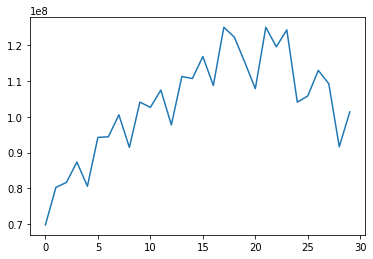

In [ ]:
# 기존 데이터 확인

plt.plot("thsmon_selng_co", data=sales_sum)

In [ ]:
# 연도별 평균 생성

c_mean2013 = sales_sum[ sales_sum["stdr_yy_cd"] == 2013 ] ["thsmon_selng_co"].mean()
c_mean2014 = sales_sum[ sales_sum["stdr_yy_cd"] == 2014 ] ["thsmon_selng_co"].mean()
c_mean2015 = sales_sum[ sales_sum["stdr_yy_cd"] == 2015 ] ["thsmon_selng_co"].mean()
c_mean2016 = sales_sum[ sales_sum["stdr_yy_cd"] == 2016 ] ["thsmon_selng_co"].mean()
c_mean2017 = sales_sum[ sales_sum["stdr_yy_cd"] == 2017 ] ["thsmon_selng_co"].mean()
c_mean2018 = sales_sum[ sales_sum["stdr_yy_cd"] == 2018 ] ["thsmon_selng_co"].mean()
c_mean2019 = sales_sum[ sales_sum["stdr_yy_cd"] == 2019 ] ["thsmon_selng_co"].mean()
c_mean2020 = sales_sum[ sales_sum["stdr_yy_cd"] == 2020 ] ["thsmon_selng_co"].mean()

In [ ]:
# 연도별 전년도대비 성장률 계산 후 확인

c_rate2014 = (c_mean2014 - c_mean2013) / c_mean2013
c_rate2015 = (c_mean2015 - c_mean2014) / c_mean2014
c_rate2016 = (c_mean2016 - c_mean2015) / c_mean2015
c_rate2017 = (c_mean2017 - c_mean2016) / c_mean2016
c_rate2018 = (c_mean2018 - c_mean2017) / c_mean2017
c_rate2019 = (c_mean2019 - c_mean2018) / c_mean2018
c_rate2020 = (c_mean2020 - c_mean2019) / c_mean2019

c_rate2014, c_rate2015, c_rate2016, c_rate2017, c_rate2018, c_rate2019, c_rate2020

(0.15888580613728717,
 0.09685633224720085,
 0.07604846452439114,
 0.07954031491938839,
 0.011624092541178134,
 -0.09348594771145283,
 -0.10677769051159279)

In [ ]:
# 전년도 대비 성장률 평균 계산

(c_rate2014 + c_rate2015 + c_rate2016 + c_rate2017 + c_rate2018) / 5

0.08459100207388913

In [ ]:
# 2019년 데이터에 더해줘야할 성장률 계산

c_rate = ((c_rate2014 + c_rate2015 + c_rate2016 + c_rate2017 + c_rate2018) / 5)  + (-c_rate2019)
c_rate

0.17807694978534194

In [ ]:
# 2019년 데이터에 18년의 rate를 곱해준 값을 더해서 저장

c_sales_up_2019 = sales_sum[ sales_sum["stdr_yy_cd"] == 2019 ] ["thsmon_selng_co"] + (c_mean2018*c_rate)

sales_c_1 = sales_sum.copy()

for i in range(0,4):
  sales_c_1.iloc[i+24][4] = c_sales_up_2019.iloc[i]

In [ ]:
# 보정된 데이터로 다시 계산

c_mean2019_up = sales_c_1[ sales_c_1["stdr_yy_cd"] == 2019 ] ["thsmon_selng_co"].mean()

c_rate2020_up = (c_mean2020 - c_mean2019_up) / c_mean2019_up

c_rate_2 = c_rate2020_up - c_rate2020
c_rate_2

-0.1466564812980351

In [ ]:
# 보정된 19년 데이터로 20년 데이터 보정

c_sales_up_2020 = sales_c_1[ sales_c_1["stdr_yy_cd"] == 2020 ] ["thsmon_selng_co"] + (c_mean2019_up*(-c_rate_2))

sales_c_2 = sales_c_1.copy()

for i in range(0,2):
  sales_c_2.iloc[i+28][4] = c_sales_up_2020.iloc[i]

In [ ]:
# 2020년의 코로나영향 제거

c_sales_up_2020_2 = sales_c_2[ sales_c_2["stdr_yy_cd"] == 2020 ] ["thsmon_selng_co"] + (c_mean2019_up*(-c_rate2020))

sales_c_3 = sales_c_2.copy()

for i in range(0,2):
  sales_c_3.iloc[i+28][4] = c_sales_up_2020_2.iloc[i]

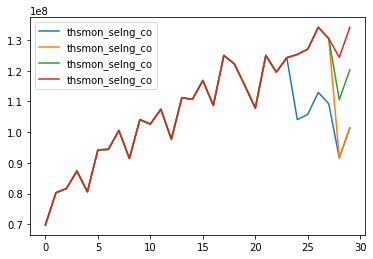

In [ ]:
# 보정데이터 시각화

plt.plot("thsmon_selng_co", data=sales_sum)
plt.plot("thsmon_selng_co", data=sales_c_1)
plt.plot("thsmon_selng_co", data=sales_c_2)
plt.plot("thsmon_selng_co", data=sales_c_3)
plt.legend()

## **매출건수 데이터 보정**

### **2019 보정**

In [ ]:
# 2018년 연평균 값 계산

s_sales_2018_mean = m_sales[m_sales["stdr_yy_cd"] == 2018].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2019년 데이터 분기별 분할 저장

m_sales_2019 = m_sales[m_sales["stdr_yy_cd"] == 2019]
s_sales_2019_1 =  m_sales_2019[m_sales_2019["stdr_qu_cd"] == 1].reset_index()
s_sales_2019_2 =  m_sales_2019[m_sales_2019["stdr_qu_cd"] == 2].reset_index()
s_sales_2019_3 =  m_sales_2019[m_sales_2019["stdr_qu_cd"] == 3].reset_index()
s_sales_2019_4 =  m_sales_2019[m_sales_2019["stdr_qu_cd"] == 4].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

def yy2019co(qu):
  temp2 = []
  for j in range(40):
    temp = m_sales[ (m_sales["stdr_yy_cd"] == 2019) & (m_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_co"].iloc[j]  + (s_sales_2018_mean["thsmon_selng_co"][j]*c_rate)
    temp2.append(temp)
  return temp2

In [ ]:
# 각 분기별 보정값 저장

temp2 = yy2019co(1)

s_sales_c_1 = pd.concat([s_sales_2019_1, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(2)

s_sales_c_2 = pd.concat([s_sales_2019_2, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(3)

s_sales_c_3 = pd.concat([s_sales_2019_3, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(4)

s_sales_c_4 = pd.concat([s_sales_2019_4, pd.DataFrame(temp2)], axis=1)

In [ ]:
s_sales_c_mod = pd.concat([s_sales_c_1,s_sales_c_2,s_sales_c_3,s_sales_c_4])
s_sales_c_mod.rename(columns={ 0 : "count" }, inplace=True)

### **2020 보정**

In [ ]:
# 보정 후 2019년 연평균 값 계산

s_sales_2019_mean = s_sales_c_mod[s_sales_c_mod["stdr_yy_cd"] == 2019].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2020년 데이터 분기별 분할 저장

s_sales_2020 = m_sales[m_sales["stdr_yy_cd"] == 2020]
s_sales_2020_1 =  s_sales_2020[s_sales_2020["stdr_qu_cd"] == 1].reset_index()
s_sales_2020_2 =  s_sales_2020[s_sales_2020["stdr_qu_cd"] == 2].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

def yy2020co(qu):
  temp1 = []
  for j in range(40):
    temp = m_sales[ (m_sales["stdr_yy_cd"] == 2020) & (m_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_co"].iloc[j]  + (s_sales_2019_mean["count"][j]*-c_rate2020_up)
    temp1.append(temp)
  return temp1

In [ ]:
# 각 분기별 보정값 저장

temp1 = yy2020co(1)

s_sales_c2_1 = pd.concat([s_sales_2020_1, pd.DataFrame(temp1)], axis=1)

In [ ]:
temp1 = yy2020co(2)

s_sales_c2_2 = pd.concat([s_sales_2020_2, pd.DataFrame(temp1)], axis=1)

In [ ]:
s_sales_c_mod2 = pd.concat([s_sales_c2_1,s_sales_c2_2])

### **2019년 이전 데이터와 결합**

In [ ]:
# 2019년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출건수 데이터 대체
#s_sales_c_mod.drop(["index","thsmon_selng_co"], axis=1, inplace=True)
s_sales_c_mod.rename(columns={ "count" : "thsmon_selng_co" }, inplace=True)

## 기존 데이터와 똑같이 칼럼순서변경
s_sales_c_mod = s_sales_c_mod[col_]

In [ ]:
# 2020년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출건수 데이터 대체
s_sales_c_mod2.drop(["index","thsmon_selng_co"], axis=1, inplace=True)
s_sales_c_mod2.rename(columns={ 0 : "thsmon_selng_co" }, inplace=True)

## 기존 데이터와 똑같이 칼럼순서변경
s_sales_c_mod2 = s_sales_c_mod2[col_]

In [ ]:
# 2019년 이전 데이터 생성

s_sales_before = m_sales[m_sales["stdr_yy_cd"].isin([2019,2020]) == False]

In [ ]:
# # 기존 데이터와 결합 후 정렬

m_sales = pd.concat([s_sales_before, s_sales_c_mod, s_sales_c_mod2])
m_sales = m_sales.sort_values(by=["area", "stdr_yy_cd", "stdr_qu_cd"])
m_sales.to_csv("m_sales.csv")

# **유동인구 급증에 따른 데이터 보정**

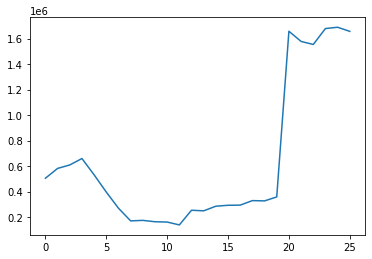

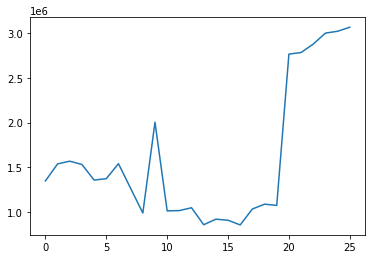

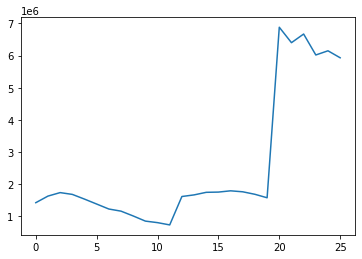

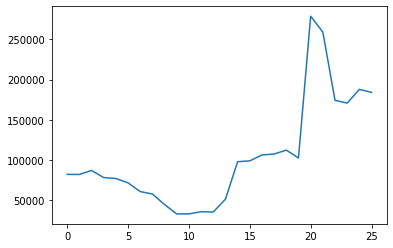

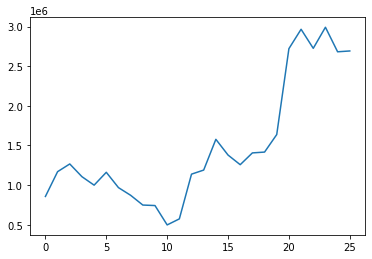

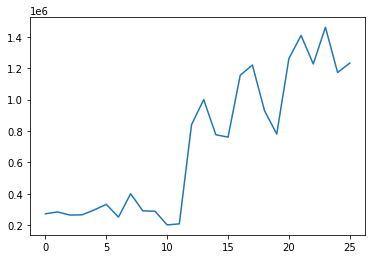

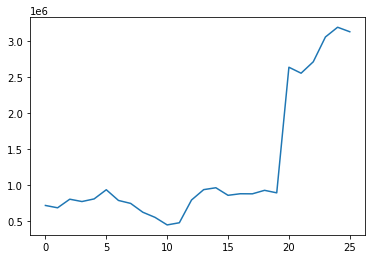

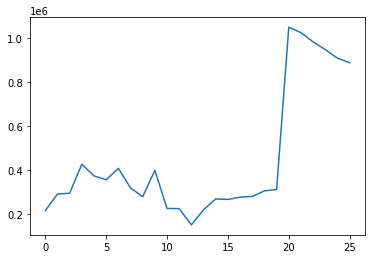

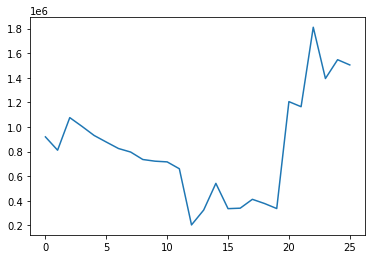

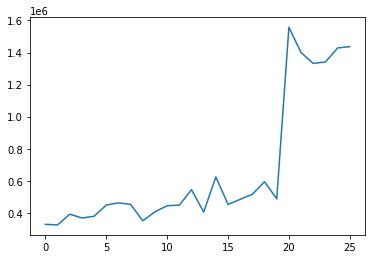

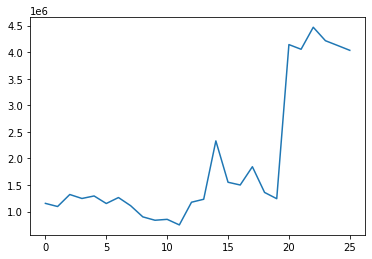

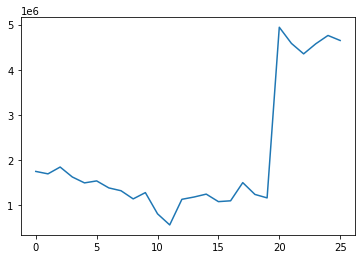

In [ ]:
# 유동인구 데이터 시각화해서 확인

for i in range(12):
  temp = a_pop[a_pop["area"]==i]
  
  plt.plot(temp.총_유동인구_수)
  plt.show()

2019년에 유동인구가 급증한다.

데이터 제공기관에 문의해 본 결과, 유동인구 데이터를 수집하는 기지국의 개수가 늘어나면서 급증하는 현상이 일어난다는 것을 확인했다.

이를 보정하기 위해 서울 전체 상권의 유동인구에서 2018년 4분기 대비 2019년 1분기 증가율의 평균을 구해 2019년 이전의 데이터에 증가율을 곱해준다.

In [ ]:
# 증가율 계산을 위해 18년 4분기와 19년 1분기의 데이터 생성

pop_1804 = pop[(pop["기준 년코드"]==2018) & (pop["기준_분기_코드"]==4)]
pop_1901 = pop[(pop["기준 년코드"]==2019) & (pop["기준_분기_코드"]==1)]

In [ ]:
# 증가율 계산

pop_1804 = pop_1804.sort_values(by= "상권_코드_명")
pop_1901 = pop_1901.sort_values(by= "상권_코드_명")
a_pop_1804 = np.array(pop_1804["총_유동인구_수"])
a_pop_1901 = np.array(pop_1901["총_유동인구_수"])

a_pop_rate = (a_pop_1901-a_pop_1804)/a_pop_1804
a_pop_rate.mean()

2.907131885456515

In [ ]:
# 선택한 상권의 19년 이전의 데이터 생성 후, 증가율 곱해서 보정

p_til18 = s_pop[s_pop["기준 년코드"] < 2019]
p_imp = p_til18.iloc[:,4:].mul(2.907)
p_imp

,총_유동인구_수,남성_유동인구_수,여성_유동인구_수,연령대_10_유동인구_수,연령대_20_유동인구_수,연령대_30_유동인구_수,연령대_40_유동인구_수,연령대_50_유동인구_수,연령대_60_이상_유동인구_수
0,1014051.717,538417.098,475628.805,38427.633,146323.845,279807.471,240097.851,198731.241,110669.490
1,363183.138,196562.619,166620.519,13258.827,42857.901,103050.243,98974.629,75986.073,29046.744
2,91518.174,48869.577,42648.597,4354.686,12633.822,24035.076,21520.521,17863.515,11107.647
3,1163445.354,617734.593,545707.854,42122.430,168440.301,316392.066,276830.703,232126.857,127518.462
4,426201.084,229289.625,196911.459,19418.760,50392.845,114381.729,113300.325,88759.431,39953.808
...,...,...,...,...,...,...,...,...,...
115,417919.041,214289.505,203612.094,18142.587,94974.597,76547.124,69541.254,93916.449,64808.658
116,421817.328,221841.891,199975.437,2802.348,89628.624,103271.175,74204.082,89404.785,62509.221
117,649051.704,317650.797,331400.907,38491.587,125213.211,119547.468,117567.801,137742.381,110486.349
118,1137198.051,600382.710,536803.713,80744.832,238783.887,218626.749,188588.718,222815.736,187629.408


In [ ]:
# 보정한 값이 있는 데이터에 인덱스 칼럼 추가한 후 원래 순서대로 정렬

add_col0 = p_til18['area'].values
p_imp['area'] = add_col0

add_col1 = p_til18['기준 년코드'].values
p_imp['기준 년코드'] = add_col1

add_col2 = p_til18['기준_분기_코드'].values
p_imp['기준_분기_코드'] = add_col2

add_col3 = p_til18['상권_코드_명'].values
p_imp['상권_코드_명'] = add_col3

p_imp = p_imp[["area","기준 년코드","기준_분기_코드","상권_코드_명","총_유동인구_수","남성_유동인구_수","여성_유동인구_수","연령대_10_유동인구_수","연령대_20_유동인구_수","연령대_30_유동인구_수","연령대_40_유동인구_수","연령대_50_유동인구_수","연령대_60_이상_유동인구_수"]]

In [ ]:
# 19년 이후의 데이터를 보정한 데이터와 병합한 후 저장

p_from19 = s_pop[ s_pop["기준 년코드"] >= 2019 ]

pop_complete = p_imp.append(p_from19)
pop_complete = pop_complete.sort_values(by=["area","기준 년코드","기준_분기_코드"])

pop_complete.to_csv("pop_complete.csv")

# **보정한 매출액과 유동인구 데이터 병합**

In [ ]:
pop_complete = pd.read_csv("/content/drive/My Drive/골목대장데이터/정리/pop_complete.csv")
m_sales = pd.read_csv("/content/drive/My Drive/골목대장데이터/정리/m_sales.csv")

In [ ]:
m_sales.drop("Unnamed: 0",axis=1,inplace=True)
pop_complete.drop("Unnamed: 0",axis=1,inplace=True)

In [ ]:
# 기준이 될 칼럼명 똑같이 변경

pop_complete.rename(columns = {"기준 년코드" : "stdr_yy_cd", "기준_분기_코드" : "stdr_qu_cd", "상권_코드_명" : "trdar_cd_nm"}, inplace = True)

In [ ]:
# area, 연도, 분기, 상권명을 기준으로 두 데이터 병합

df_all = pd.merge(m_sales, pop_complete, on=["area", "stdr_yy_cd","stdr_qu_cd","trdar_cd_nm"], how="outer")

In [ ]:
# 복잡한 칼럼명 단순화

df_all = df_all.iloc[:,[0,1,2,3,4,5,22]]
df_all.columns = ["area", "yy", "qu", "name", "amount", "count", "pop"]
df_all.to_csv("df_all.csv")
df_all

,area,yy,qu,name,amount,count,pop
0,0,2013,1,소월로20길,4.050417e+08,3.271000e+04,NaN
1,0,2013,1,신흥로20길,8.297124e+08,1.822200e+04,NaN
2,0,2013,1,신흥시장,1.118125e+08,7.422000e+03,NaN
3,0,2013,2,소월로20길,5.591971e+08,4.318800e+04,NaN
4,0,2013,2,신흥로20길,8.996890e+08,2.111800e+04,NaN
...,...,...,...,...,...,...,...
1195,11,2020,2,긴고랑로7길,1.549167e+09,8.130043e+08,712211.0
1196,11,2020,2,긴고랑로8길,5.190873e+08,1.357448e+10,985083.0
1197,11,2020,2,긴고랑로9길,1.885947e+09,1.424678e+08,644935.0
1198,11,2020,2,용마산로21길,2.334724e+09,1.119448e+09,1459316.0


# **지역별, 시점별 방송여부 구분 칼럼 추가**

In [ ]:
df_all = pd.read_csv("/content/drive/My Drive/골목대장데이터/정리/df_all.csv")

In [ ]:
# 2020년 2분기까지의 데이터밖에 없으므로 그 이후에 방영한 두개 상권 삭제

df_drop = df_all[ df_all["area"] < 10 ]

In [ ]:
# 방송 점포 포함 상권

bs = ["신흥시장", "상원길", "천호대로162길", "포방터시장", "청파로47길", "경희대로4길", "양재대로96길", "정릉아리랑시장", "세무서길", "공릉동도깨비시장"]

In [ ]:
# 방송에 직접적으로 나온 점포가 포함된 상권일 경우 1, 그 외는 0인 변수 추가

df_bs = df_drop[df_drop["name"].isin(bs)]
df_bs["location"]=1

df_notbs = df_drop[ df_drop["name"].isin(bs) == False ]
df_notbs["location"] = 0

df_add1 = pd.concat([df_bs,df_notbs])
df_add1 = df_add1.sort_values(["area", "yy", "qu","name"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# 상권별 방송일자

bd = [22,22,23,24,25,25,28,28,29,29]
by = [2018, 2018, 2018, 2018, 2019, 2019, 2019, 2019,  2020,  2020]
bq = [2,2,3,4,1,1,4,4,1,1]

In [ ]:
# 상권별 방송일자 이후에는 1, 이전은 0인 변수 추가 후 csv로 저장

a = []
for i in range(10):
  temp = df_drop[ df_drop["area"] == i ]
  df_bf1 = temp[ (temp["yy"] < by[i]) | ((temp["yy"] == by[i]) & (temp["qu"] < bq[i])) ]
  df_bf2 = temp[ (temp["yy"] > by[i]) | ((temp["yy"] == by[i]) & (temp["qu"] >= bq[i])) ]
  df_bf1["time"] = 0
  df_bf2["time"] = 1
  temp = pd.concat( [df_bf1, df_bf2] )
  a.append(temp)

df_full = pd.concat( [a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8],a[9]] )

df_full["location"] = df_add1["location"]

df_full = df_full.sort_values( ["area", "yy", "qu", "name"] )

df_full.to_csv("df_full.csv")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

# **상권별 시청률 칼럼 추가**

In [ ]:
# 상권별 시청률 평균

rating0=np.mean([4.4,5.0,5.7,5.0,5.1])
rating1=np.mean([5.7,5.2,5.8,4.4,4.8])
rating2=np.mean([6.2,5.5,6.1,5.5])
rating3=np.mean([6.5,7.8,7.0,8.3,8.6,8.6])
rating4=np.mean([8.1,9.4,9.5,10.4,8.6])
rating5=np.mean([9.5,8.8,8.8,8.5,8.9])
rating6=np.mean([5.4,5.6,6.3,5.4,5.0])
rating7=np.mean([6.1,5.2,5.3,5.7])
rating8=np.mean([7.0,7.6,7.5,6.8])
rating9=np.mean([8.1,7.2,7.5,8.2,9.0])

In [ ]:
# 상권별 시청률 추가

rating=[]
for j in range(10):
  for i in range(len(df_full[df_full["area"]==j])):
    rating.append(globals()['rating{}'.format(j)])

In [ ]:
# 리스트를 데이터프레임으로 변환 후 기존 데이터에 병합
pd.DataFrame(rating)

df_real = df_full.copy()

df_real["rating"]=rating
df_real.to_csv("df_real.csv")

# **상도동 데이터 전처리**

In [ ]:
sangdo_sales = pd.read_csv("/content/sangdo_sales.csv", encoding="CP949")

In [ ]:
sangdo_mean = sangdo_sales.groupby(["stdr_yy_cd","stdr_qu_cd"]).mean().reset_index()

## **매출액 보정**

### **2019 보정**

In [ ]:
# 2018년 연평균 값 계산

mean_2018 = sangdo_sales[sangdo_sales["stdr_yy_cd"] == 2018].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2019년 데이터 분기별 분할 저장

sangdo_2019 = sangdo_sales[sangdo_sales["stdr_yy_cd"] == 2019]
sangdo_2019_1 =  sangdo_2019[sangdo_2019["stdr_qu_cd"] == 1].reset_index()
sangdo_2019_2 =  sangdo_2019[sangdo_2019["stdr_qu_cd"] == 2].reset_index()
sangdo_2019_3 =  sangdo_2019[sangdo_2019["stdr_qu_cd"] == 3].reset_index()
sangdo_2019_4 =  sangdo_2019[sangdo_2019["stdr_qu_cd"] == 4].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

rate = 0.163171808003894

def yy2019(qu):
  temp2 = []
  for j in range(2):
    temp = sangdo_sales[ (sangdo_sales["stdr_yy_cd"] == 2019) & (sangdo_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_amt"].iloc[j]  + (mean_2018["thsmon_selng_amt"][j]*rate)
    temp2.append(temp)
  return temp2

In [ ]:
# 각 분기별 보정값 저장

temp2 = yy2019(1)

sangdo_add_1 = pd.concat([sangdo_2019_1, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(2)

sangdo_add_2 = pd.concat([sangdo_2019_2, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(3)

sangdo_add_3 = pd.concat([sangdo_2019_3, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019(4)

sangdo_add_4 = pd.concat([sangdo_2019_4, pd.DataFrame(temp2)], axis=1)

In [ ]:
sangdo_mod = pd.concat([sangdo_add_1,sangdo_add_2,sangdo_add_3,sangdo_add_4])
sangdo_mod.rename(columns={ 0 : "amount" }, inplace=True)

### **2020 보정**

In [ ]:
# 보정 후 2019년 연평균 값 계산

mean_2019 = sangdo_mod[sangdo_mod["stdr_yy_cd"] == 2019].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2020년 데이터 분기별 분할 저장

sangdo_2020 = sangdo_sales[sangdo_sales["stdr_yy_cd"] == 2020]
sangdo_2020_1 =  sangdo_2020[sangdo_2020["stdr_qu_cd"] == 1].reset_index()
sangdo_2020_2 =  sangdo_2020[sangdo_2020["stdr_qu_cd"] == 2].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

rate2020_up = -0.13921023107163907 - 0.09828061082274578

def yy2020(qu):
  temp1 = []
  for j in range(2):
    temp = sangdo_sales[ (sangdo_sales["stdr_yy_cd"] == 2020) & (sangdo_sales["stdr_qu_cd"] == qu) ] ["thsmon_selng_amt"].iloc[j]  + (mean_2019["amount"][j]*(-rate2020_up))
    temp1.append(temp)
  return temp1

In [ ]:
# 각 분기별 보정값 저장

temp1 = yy2020(1)

sangdo_add2_1 = pd.concat([sangdo_2020_1, pd.DataFrame(temp1)], axis=1)

In [ ]:
temp1 = yy2020(2)

sangdo_add2_2 = pd.concat([sangdo_2020_2, pd.DataFrame(temp1)], axis=1)

In [ ]:
sangdo_mod2 = pd.concat([sangdo_add2_1,sangdo_add2_2])

### **2019년 이전 데이터와 결합**

In [ ]:
#2019년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출액 데이터 대체
sangdo_mod.drop(["index","thsmon_selng_amt"], axis=1, inplace=True)
sangdo_mod.rename(columns={ "amount" : "thsmon_selng_amt" }, inplace=True)

## 기존 데이터와 똑같이 열 순서 변경
col_ = ["stdr_yy_cd", "stdr_qu_cd", "trdar_cd_nm", "thsmon_selng_amt", "thsmon_selng_co", "ml_selng_amt","ml_selng_co", "fml_selng_amt","fml_selng_co",
        "agrde_10_selng_amt",	"agrde_20_selng_amt",	"agrde_30_selng_amt",	"agrde_40_selng_amt",	"agrde_50_selng_amt",	"agrde_60_above_selng_amt",
        "agrde_10_selng_co",	"agrde_20_selng_co",	"agrde_30_selng_co",	"agrde_40_selng_co",	"agrde_50_selng_co",	"agrde_60_above_selng_co"]

sangdo_mod = sangdo_mod[col_]


In [ ]:
# 2020년 보정 데이터 열 수정

## 불필요 열 삭제
sangdo_mod2.drop(["index","thsmon_selng_amt"], axis=1, inplace=True)
sangdo_mod2.rename(columns={ 0 : "thsmon_selng_amt" }, inplace=True)

## 기존 데이터와 똑같이 열 순서 변경

sangdo_mod2 = sangdo_mod2[col_]

In [ ]:
# 2019년 이전 데이터 생성

sangdo_before = sangdo_sales[sangdo_sales["stdr_yy_cd"].isin([2019,2020]) == False]

In [ ]:
# 기존 데이터와 결합 후 정렬

sangdo_m = pd.concat([sangdo_before, sangdo_mod, sangdo_mod2])
sangdo_m = sangdo_m.sort_values(by=["stdr_yy_cd", "stdr_qu_cd"])

## **매출건수 보정**

### **2019 보정**

In [ ]:
# 2018년 연평균 값 계산

mean2018_c = sangdo_m[sangdo_m["stdr_yy_cd"] == 2018].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2019년 데이터 분기별 분할 저장

sangdo_m_2019 = sangdo_m[sangdo_m["stdr_yy_cd"] == 2019]
sangdo_2019_1 =  sangdo_m_2019[sangdo_m_2019["stdr_qu_cd"] == 1].reset_index()
sangdo_2019_2 =  sangdo_m_2019[sangdo_m_2019["stdr_qu_cd"] == 2].reset_index()
sangdo_2019_3 =  sangdo_m_2019[sangdo_m_2019["stdr_qu_cd"] == 3].reset_index()
sangdo_2019_4 =  sangdo_m_2019[sangdo_m_2019["stdr_qu_cd"] == 4].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

c_rate = 0.17807694978534194

def yy2019co(qu):
  temp2 = []
  for j in range(2):
    temp = sangdo_m[ (sangdo_m["stdr_yy_cd"] == 2019) & (sangdo_m["stdr_qu_cd"] == qu) ] ["thsmon_selng_co"].iloc[j]  + (mean2018_c["thsmon_selng_co"][j]*c_rate)
    temp2.append(temp)
  return temp2

In [ ]:
# 각 분기별 보정값 저장

temp2 = yy2019co(1)

sangdo_c_1 = pd.concat([sangdo_2019_1, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(2)

sangdo_c_2 = pd.concat([sangdo_2019_2, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(3)

sangdo_c_3 = pd.concat([sangdo_2019_3, pd.DataFrame(temp2)], axis=1)

In [ ]:
temp2 = yy2019co(4)

sangdo_c_4 = pd.concat([sangdo_2019_4, pd.DataFrame(temp2)], axis=1)

In [ ]:
sangdo_c_mod = pd.concat([sangdo_c_1,sangdo_c_2,sangdo_c_3,sangdo_c_4])
sangdo_c_mod.rename(columns={ 0 : "count" }, inplace=True)

### **2020 보정**

In [ ]:
# 보정 후 2019년 연평균 값 계산

mean_2019_c = sangdo_c_mod[sangdo_c_mod["stdr_yy_cd"] == 2019].groupby("trdar_cd_nm").mean().reset_index()

In [ ]:
# 2020년 데이터 분기별 분할 저장

sangdo_m_2020 = sangdo_m[sangdo_m["stdr_yy_cd"] == 2020]
sangdo_2020_1 =  sangdo_m_2020[sangdo_m_2020["stdr_qu_cd"] == 1].reset_index()
sangdo_2020_2 =  sangdo_m_2020[sangdo_m_2020["stdr_qu_cd"] == 2].reset_index()

In [ ]:
# 각 분기별 보정 함수 저장

c_rate_2 = -0.1466564812980351 - 0.10677769051159279

def yy2020co(qu):
  temp1 = []
  for j in range(2):
    temp = sangdo_m[ (sangdo_m["stdr_yy_cd"] == 2020) & (sangdo_m["stdr_qu_cd"] == qu) ] ["thsmon_selng_co"].iloc[j]  + (mean_2019_c["count"][j]*(-c_rate_2))
    temp1.append(temp)
  return temp1

In [ ]:
# 각 분기별 보정값 저장

temp1 = yy2020co(1)

sangdo_c2_1 = pd.concat([sangdo_2020_1, pd.DataFrame(temp1)], axis=1)

In [ ]:
temp1 = yy2020co(2)

sangdo_c2_2 = pd.concat([sangdo_2020_2, pd.DataFrame(temp1)], axis=1)

In [ ]:
sangdo_c_mod2 = pd.concat([sangdo_c2_1,sangdo_c2_2])

### **2019년 이전 데이터와 결합**

In [ ]:
# 2019년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출건수 데이터 대체
sangdo_c_mod.drop(["index","thsmon_selng_co"], axis=1, inplace=True)
sangdo_c_mod.rename(columns={ "count" : "thsmon_selng_co" }, inplace=True)

## 기존 데이터와 똑같이 칼럼순서변경
sangdo_c_mod = sangdo_c_mod[col_]

In [ ]:
# 2020년 보정 데이터 열 수정

## 불필요 열 삭제, 기존 매출건수 데이터 대체
sangdo_c_mod2.drop(["index","thsmon_selng_co"], axis=1, inplace=True)
sangdo_c_mod2.rename(columns={ 0 : "thsmon_selng_co" }, inplace=True)

## 기존 데이터와 똑같이 칼럼순서변경
sangdo_c_mod2 = sangdo_c_mod2[col_]

In [ ]:
# 2019년 이전 데이터 생성

sangdo_before2 = sangdo_m[sangdo_m["stdr_yy_cd"].isin([2019,2020]) == False]

In [ ]:
# # 기존 데이터와 결합 후 정렬

sangdo_m2 = pd.concat([sangdo_before2, sangdo_c_mod, sangdo_c_mod2])
sangdo_m2 = sangdo_m2.sort_values(by=["stdr_yy_cd", "stdr_qu_cd"])
sangdo_m2.to_csv("sangdo_m.csv")